Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('1. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 1st league',
       'Thrower team', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Goalkeeper name', 'Goalkeeper Club', 'Goalkeeper \nheight (cm)',
       'Thrower \nheight (cm)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-99up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition','goalKeeperName', 
              'goalkeeperTeam','goalKeeperHeightCM','shooterheightCM',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'goalKeeperName':'string','goalkeeperTeam':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,...,goalkeeperTeam,goalKeeperHeightCM,shooterheightCM,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,SC Magdeburg,TVB 1898 Stuttgart,1.0,MGN,SC Magdeburg,19.0,18.0,9.0,9.0,1.0,...,TVB 1898 Stuttgart,194.0,186.0,1.0,2.0,7.0,0.0,1.0,NaN,NaN
1,SC Magdeburg,TVB 1898 Stuttgart,1.0,MGN,SC Magdeburg,32.0,20.0,17.0,16.0,1.0,...,TVB 1898 Stuttgart,194.0,186.0,1.0,2.0,9.0,0.0,2.0,7.0,1.0
2,SC Magdeburg,TVB 1898 Stuttgart,1.0,MGN,SC Magdeburg,40.0,44.0,22.0,18.0,1.0,...,TVB 1898 Stuttgart,196.0,186.0,1.0,2.0,8.0,1.0,3.0,9.0,1.0
3,SC Magdeburg,TVB 1898 Stuttgart,1.0,MGN,SC Magdeburg,46.0,21.0,27.0,22.0,1.0,...,TVB 1898 Stuttgart,196.0,186.0,0.0,2.0,4.0,0.0,4.0,8.0,1.0
4,Rhein-Neckar Löwen,SC Magdeburg,2.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,THW Kiel,TuS N-Lübecke,31.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,THW Kiel,Handball Sport Verein Hamburg,32.0,ESG,THW Kiel,11.0,42.0,4.0,1.0,1.0,...,Handball Sport Verein Hamburg,205.0,191.0,0.0,2.0,8.0,0.0,1.0,NaN,NaN
334,THW Kiel,Handball Sport Verein Hamburg,32.0,ESG,THW Kiel,47.0,59.0,24.0,14.0,1.0,...,Handball Sport Verein Hamburg,195.0,191.0,1.0,2.0,7.0,2.0,2.0,8.0,0.0
335,Rhein-Neckar Löwen,THW Kiel,33.0,ESG,THW Kiel,44.0,35.0,21.0,22.0,1.0,...,Rhein-Neckar Löwen,196.0,191.0,1.0,2.0,9.0,0.0,1.0,NaN,NaN


In [4]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['name'], df['throwDirection'],) 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
name,,,,,,,,,
ESG,4,5,12,2,0,0,33,5,19
LAB,24,1,8,4,2,1,23,13,19
MGN,27,1,18,7,0,1,36,21,24


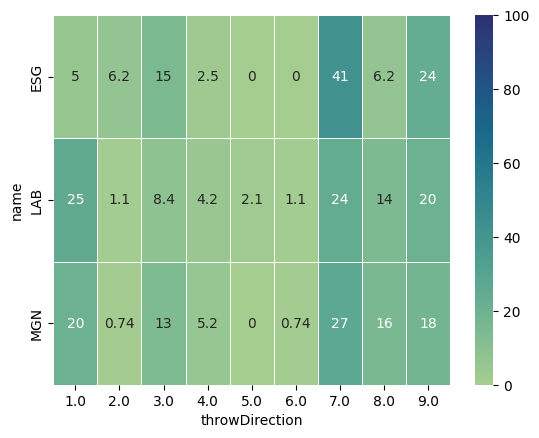

In [5]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100)
#ax.xaxis.tick_top()
plt.show()

In [6]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
ESG,14,66
LAB,6,89
MGN,27,108


In [7]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess         0.0  1.0
name throwDirection          
ESG  1.0               1    3
     2.0               2    3
     3.0               1   11
     4.0               1    1
     7.0               4   29
     8.0               1    4
     9.0               4   15
LAB  1.0               0   24
     2.0               0    1
     3.0               1    7
     4.0               0    4
     5.0               0    2
     6.0               1    0
     7.0               1   22
     8.0               2   11
     9.0               1   18
MGN  1.0               4   23
     2.0               0    1
     3.0               5   13
     4.0               3    4
     6.0               0    1
     7.0               8   28
     8.0               5   16
     9.0               2   22

In [8]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess         0.0  1.0
name throwDirection          
ESG  1.0               1    3
     2.0               2    3
     3.0               1   11
     4.0               1    1
     7.0               4   29
     8.0               1    4
     9.0               4   15
LAB  1.0               0   24
     2.0               0    1
     3.0               1    7
     4.0               0    4
     5.0               0    2
     6.0               1    0
     7.0               1   22
     8.0               2   11
     9.0               1   18
MGN  1.0               4   23
     2.0               0    1
     3.0               5   13
     4.0               3    4
     6.0               0    1
     7.0               8   28
     8.0               5   16
     9.0               2   22

Playerwise Successfull Throw

In [9]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
ESG,3,3,11,1,0,0,29,4,15,66
LAB,24,1,7,4,2,0,22,11,18,89
MGN,23,1,13,4,0,1,28,16,22,108
Total,50,5,31,9,2,1,79,31,55,263


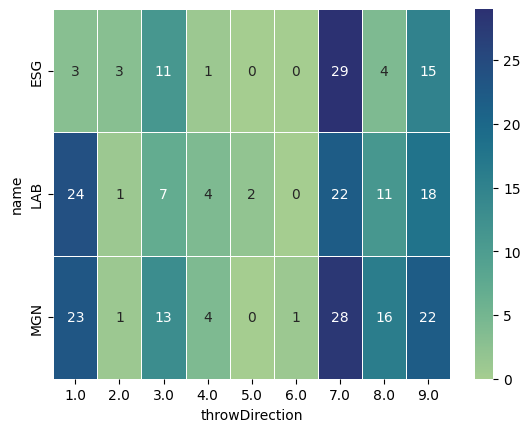

In [10]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [11]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
ESG,1,2,1,1,0,4,1,4,14
LAB,0,0,1,0,1,1,2,1,6
MGN,4,0,5,3,0,8,5,2,27
Total,5,2,7,4,1,13,8,7,47


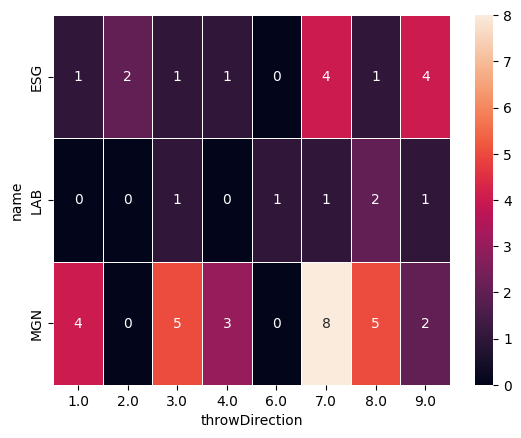

In [12]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

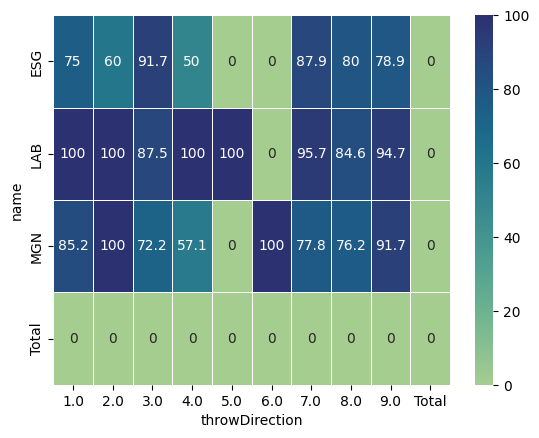

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
ESG,75.000000,60.0,91.666667,50.000000,0.0,0.0,87.878788,80.000000,78.947368,0.0
LAB,100.000000,100.0,87.500000,100.000000,100.0,0.0,95.652174,84.615385,94.736842,0.0
MGN,85.185185,100.0,72.222222,57.142857,0.0,100.0,77.777778,76.190476,91.666667,0.0
Total,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [13]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess